In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100


In [3]:
sigma = 0.5
mu = 1.6
Ntot = 2048*16
B = sigma * np.random.randn(Ntot) + mu
C = np.random.poisson(5, Ntot)
D = np.random.random(Ntot)

# print(B)
fs = 1000.0
beta = 10.0
window_length = 1024
numoverlap = 880
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
boxcarw = signal.boxcar(window_length)



fval, psd1 = np.absolute(signal.welch((B/mu), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap))
fval, psd2 = np.absolute(signal.welch(D, fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap))

# plt.loglog( fval, psd/mu**2, label = "trial PSD gaussian" )
# plt.ylim(1.0E-5,1.0E-3)

# plt.show()

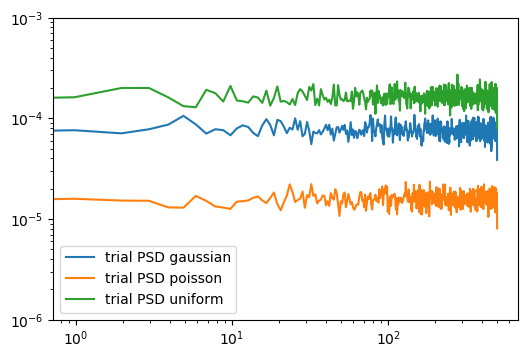

In [4]:
lam = 5.0
C = np.random.poisson(lam, Ntot)

# print(B)

fs = 1000.0
beta = 10.0
window_length = 1024
numoverlap = 880
kaiserw = signal.get_window(('kaiser', beta), window_length) # Kaiser window
boxcarw = signal.boxcar(window_length)



fval, psd = np.absolute(signal.welch((C/lam), fs, nperseg = window_length, window=boxcarw, noverlap = numoverlap))
plt.loglog( fval, psd1/mu**2, label = "trial PSD gaussian" )
plt.loglog( fval, psd/lam**2, label = "trial PSD poisson" )
plt.loglog( fval, psd2, label = "trial PSD uniform" )
plt.ylim(1.0E-6,1.0E-3)
plt.legend()
plt.show()



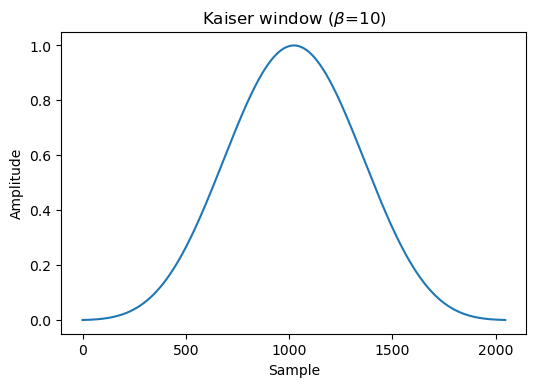

In [70]:
window = signal.kaiser(2048, beta=10)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$="+format(beta, '.0f')+")")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.savefig("Kais.pdf")
plt.show()

In [65]:
fs = 1.
fsam = 10000.
N = 1e5
amp = 2*np.sqrt(2)
freq = 1234.0
noise_power = 1 / 2
time = np.arange(N) / fsam
x = amp*np.sin(2*np.pi*freq*time)
x += np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
ff, Pxx_den = signal.welch(x, fsam, nperseg=2048)

print(np.shape(ff), ff)

(1025,) [0.00000000e+00 4.88281250e+00 9.76562500e+00 ... 4.99023438e+03
 4.99511719e+03 5.00000000e+03]


Text(0, 0.5, 'PSD [V**2/Hz]')

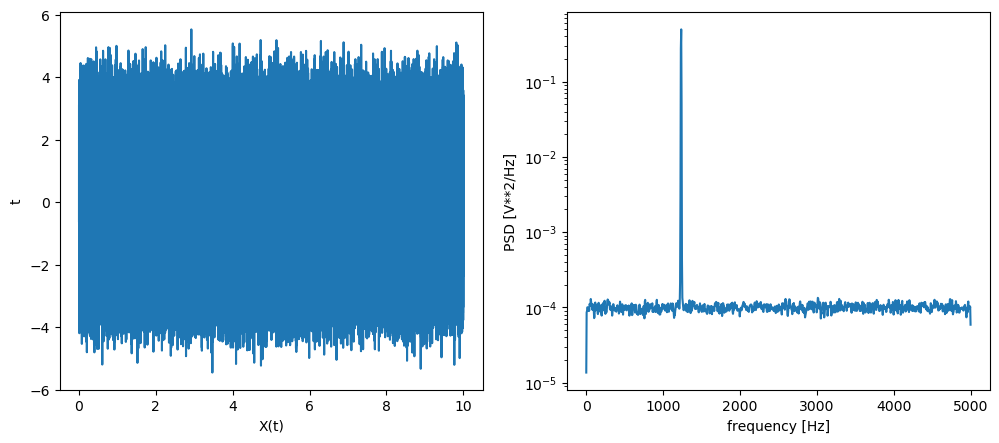

In [66]:

f = plt.figure(figsize=(12, 5)); # plot the calculated values    

sp =  f.add_subplot(1, 2, 1 );
plt.plot(time,x)
# plt.xlim(4.5,4.6)
plt.xlabel('X(t)')
plt.ylabel('t')

sp =  f.add_subplot(1, 2, 2 );
plt.semilogy(ff, Pxx_den)
# plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
# plt.show()



617.0